In [1]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

In [2]:
data = pandas.read_csv("C:\\Users\\Admin\\Documents\\Python\\movies_metadata.csv", low_memory=False)
std = np.std(data["runtime"])
data["runtimeIdeal"]= data["runtime"].apply(lambda x: "ideal" if x > 90 and x < 120 else "not ideal")
data['budget'] = pandas.to_numeric(data['budget'], errors='coerce')
data['vote_count'] = pandas.to_numeric(data['vote_count'], errors='coerce')
dataReveiws = (data["vote_count"]>=100) #remove films with less than 100 ratings to prevent films that had been biased by a lack of opinions
data = data[dataReveiws]


dataMid = data
budgetLowIdeal = (data["budget"]>=25000000)
budgetHighIdeal = (data["budget"]<=75000000)
dataMid = dataMid[budgetLowIdeal]
dataMid = dataMid[budgetHighIdeal]
dataMidCount = len(dataMid)

c:\programdata\miniconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [3]:
dataHigh= data
budgetOverHighIdeal = (dataHigh["budget"]>75000000)
dataHigh = data[budgetOverHighIdeal]
dataHighCount = len(dataHigh)

In [4]:
dataLow= data
budgetBelowLowIdeal = (dataLow["budget"]<25000000)
budgetBelowHighIdeal = (dataLow["budget"]>=2500000)

dataLow = dataLow[budgetBelowLowIdeal]
dataLow = dataLow[budgetBelowHighIdeal]
dataLowCount = len(dataLow)

c:\programdata\miniconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


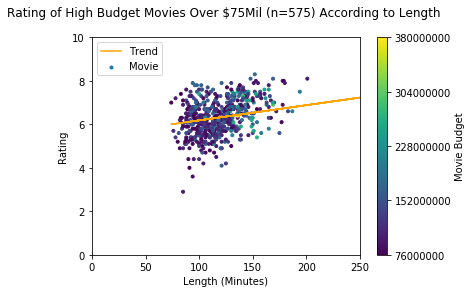

In [5]:
plt.xlim([0,250])
plt.ylim([0,10])

trend = np.polyfit(dataHigh["runtime"], dataHigh["vote_average"],1)
line = plt.plot(dataHigh["runtime"],trend[1]+trend[0]*dataHigh["runtime"], c="orange", label="Trend")
scatter = plt.scatter(dataHigh["runtime"], dataHigh["vote_average"], c=dataHigh["budget"], alpha=1, marker=r'.',
                label="Movie")
cbar = plt.colorbar(scatter, label="Movie Budget" )
plt.xlabel("Length (Minutes)")
plt.ylabel("Rating")

t = 'Rating of High Budget Movies Over $75Mil (n='+str(dataHighCount)+') According to Length \n'
plt.title(t)

plt.legend(dataHigh["runtime"])

m0=int(np.floor(dataHigh["budget"].min()))            # colorbar min value
m4=int(np.ceil(dataHigh["budget"].max()))             # colorbar max value
m1=int(1*(m4-m0)/4.0 + m0)               # colorbar mid value 1
m2=int(2*(m4-m0)/4.0 + m0)               # colorbar mid value 2
m3=int(3*(m4-m0)/4.0 + m0)               # colorbar mid value 3
cbar.set_ticks([m0,m1,m2,m3,m4])
cbar.set_ticklabels([m0,m1,m2,m3,m4])


plt.legend(loc=2)
plt.show()

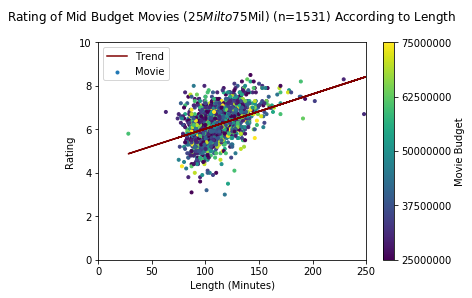

In [6]:
plt.xlim([0,250])
plt.ylim([0,10])

trend = np.polyfit(dataMid["runtime"], dataMid["vote_average"],1)
line = plt.plot(dataMid["runtime"],trend[1]+trend[0]*dataMid["runtime"], c="maroon", label="Trend")
scatter = plt.scatter(dataMid["runtime"], dataMid["vote_average"], c=dataMid["budget"], alpha=1, marker=r'.',
                label="Movie")
cbar = plt.colorbar(scatter, label="Movie Budget" )
plt.xlabel("Length (Minutes)")
plt.ylabel("Rating")

t = 'Rating of Mid Budget Movies ($25 Mil to $75Mil) (n='+str(dataMidCount)+') According to Length \n'
plt.title(t)

plt.legend(dataMid["runtime"])

m0=int(np.floor(dataMid["budget"].min()))            # colorbar min value
m4=int(np.ceil(dataMid["budget"].max()))             # colorbar max value
m1=int(1*(m4-m0)/4.0 + m0)               # colorbar mid value 1
m2=int(2*(m4-m0)/4.0 + m0)               # colorbar mid value 2
m3=int(3*(m4-m0)/4.0 + m0)               # colorbar mid value 3
cbar.set_ticks([m0,m1,m2,m3,m4])
cbar.set_ticklabels([m0,m1,m2,m3,m4])


plt.legend(loc=2)
plt.show()

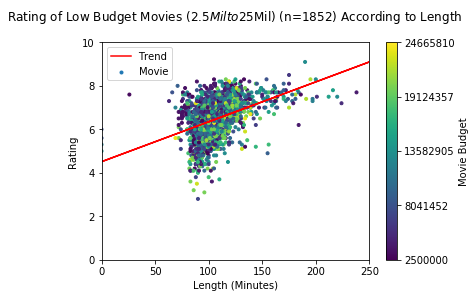

In [7]:
plt.xlim([0,250])
plt.ylim([0,10])

trend = np.polyfit(dataLow["runtime"], dataLow["vote_average"],1)
line = plt.plot(dataLow["runtime"],trend[1]+trend[0]*dataLow["runtime"], c="red", label="Trend")
scatter = plt.scatter(dataLow["runtime"], dataLow["vote_average"], c=dataLow["budget"], alpha=1, marker=r'.',
                label="Movie")
cbar = plt.colorbar(scatter, label="Movie Budget" )
plt.xlabel("Length (Minutes)")
plt.ylabel("Rating")
t = 'Rating of Low Budget Movies ($2.5 Mil to $25Mil) (n='+str(dataLowCount)+') According to Length \n'
plt.title(t)
plt.legend(dataLow["runtime"])

m0=int(np.floor(dataLow["budget"].min()))            # colorbar min value
m4=int(np.ceil(dataLow["budget"].max()))             # colorbar max value
m1=int(1*(m4-m0)/4.0 + m0)               # colorbar mid value 1
m2=int(2*(m4-m0)/4.0 + m0)               # colorbar mid value 2
m3=int(3*(m4-m0)/4.0 + m0)               # colorbar mid value 3
cbar.set_ticks([m0,m1,m2,m3,m4])
cbar.set_ticklabels([m0,m1,m2,m3,m4])


plt.legend(loc=2)
plt.show()

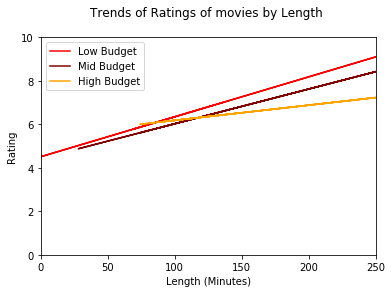

In [8]:
plt.xlim([0,250])
plt.ylim([0,10])


trend1 = np.polyfit(dataLow["runtime"], dataLow["vote_average"],1)
line = plt.plot(dataLow["runtime"],trend1[1]+trend1[0]*dataLow["runtime"], c="red", label="Low Budget")
trend0 = np.polyfit(dataMid["runtime"], dataMid["vote_average"],1)
line = plt.plot(dataMid["runtime"],trend0[1]+trend0[0]*dataMid["runtime"], c="maroon", label="Mid Budget")
trend2 = np.polyfit(dataHigh["runtime"], dataHigh["vote_average"],1)
line = plt.plot(dataHigh["runtime"],trend2[1]+trend2[0]*dataHigh["runtime"], c="orange", label="High Budget")

plt.xlabel("Length (Minutes)")
plt.ylabel("Rating")
t = 'Trends of Ratings of movies by Length \n'
plt.title(t)


plt.legend(loc=2)
plt.show()
